In [ ]:
import pandas as pd
import numpy as np
import json

'''Features'''
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import label_binarize

'''Classifiers'''
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef


'''Metrics/Evaluation'''
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from scipy import interp
from itertools import cycle

'''Plotting'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

'''Display'''
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
path = "/Users/vaspo224/Documents/UppsalaUniversity/PROTAC/Classification/KNIME-Protacs/Dataset/Prasad/Retrained2.csv"
df =pd.read_csv(path)
df.head()

,Var01,Var02,Var03,Var04,Var05,Var06,Var07,Var08,Var09,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Class
0,963.31,718.22,0.25,70,38,1,19,19,76,7,3,0.41,5,12,234.20,758.58,2.12,Yellow
1,"1,050.00",786.32,0.30,76,38,1,21,25,82,7,3,0.45,5,14,252.65,841.37,2.10,Green
2,959.12,716.45,0.25,69,38,0,18,19,75,7,3,0.41,5,12,234.19,747.65,2.03,Green
3,"1,090.00",827.01,0.36,78,38,0,20,30,84,7,3,0.50,4,15,242.02,901.34,2.40,Green
4,"1,000.00",758.91,0.31,72,38,0,18,24,78,7,3,0.46,4,13,223.55,818.56,2.33,Green


In [ ]:
#path = "/Users/vaspo224/Documents/UppsalaUniversity/PROTAC/Classification/KNIME-Protacs/Dataset/VHL_Retrained.csv"
#df =pd.read_csv(path)


#del df["cpd No"]
#del df["Project Nr"]
#del df["TB"]
#del df["VHL-Bind"]
#del df["VHL"]
#del df["Cell / Biochem"]
#del df["Target"]
#del df["MolWt"]

#df.head()

In [ ]:
X = df.loc[:,'Var01':'Var17']
y = df.Class
X.head()

,Var01,Var02,Var03,Var04,Var05,Var06,Var07,Var08,Var09,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17
0,963.31,718.22,0.25,70,38,1,19,19,76,7,3,0.41,5,12,234.20,758.58,2.12
1,"1,050.00",786.32,0.30,76,38,1,21,25,82,7,3,0.45,5,14,252.65,841.37,2.10
2,959.12,716.45,0.25,69,38,0,18,19,75,7,3,0.41,5,12,234.19,747.65,2.03
3,"1,090.00",827.01,0.36,78,38,0,20,30,84,7,3,0.50,4,15,242.02,901.34,2.40
4,"1,000.00",758.91,0.31,72,38,0,18,24,78,7,3,0.46,4,13,223.55,818.56,2.33


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class_encode'] = le.fit_transform(y)

In [ ]:
import joblib
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
from scipy.stats import probplot


from sklearn.base import clone
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.model_selection import cross_val_score, RepeatedKFold, permutation_test_score, LeaveOneGroupOut
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer

In [ ]:
plt.style.use("default")
%matplotlib inline
%config InlineBackend.figure_format = "png"
figsize_default = np.array(matplotlib.rc_params()["figure.figsize"])

In [ ]:
correlation = df.corr()

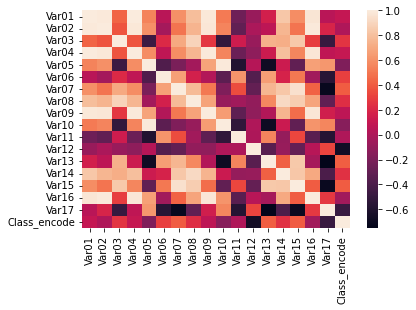

In [ ]:
sns.heatmap(correlation.corr());

<AxesSubplot:>

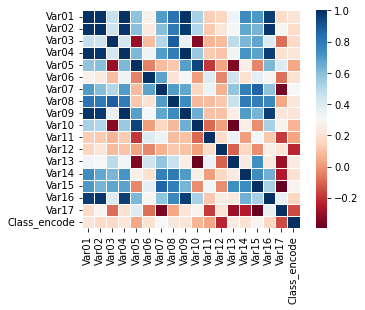

In [ ]:
sns.heatmap(correlation, cmap="RdBu", square=True, linewidths=.5)

In [ ]:
#Dimenionality reduction. Only using the 10 of 17 best features er category

lsa = TruncatedSVD(n_components=10, 
                   n_iter=10)

X = lsa.fit_transform(X)
X.shape

(253, 10)

In [ ]:
X.shape

(253, 10)

In [ ]:
#Train test split with stratified sampling for evaluation

#train = np.load("/train_test_data/train_indices.npy")
#test = np.load("train_test_data/test_indices.npy")

In [ ]:
#Preliminary model evaluation using default parameters

#Creating a dict of the models
model_dict = {'Dummy' : DummyClassifier(random_state=3),
              'Stochastic Gradient Descent' : SGDClassifier(random_state=3, loss='log'),
              'Random Forest': RandomForestClassifier(random_state=0),
              'Decision Tree': DecisionTreeClassifier(random_state=0),
              'AdaBoost': AdaBoostClassifier(random_state=3),
              'Gaussian Naive Bayes': GaussianNB(),
              'K Nearest Neighbor': KNeighborsClassifier(5),
              'SVM': svm.SVC(),
              'GPC': GaussianProcessClassifier()}

#Train test split with stratified sampling for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = .33, 
                                                    shuffle = True, 
                                                    stratify = y, 
                                                    random_state = 5)

#Function to get the scores for each model in a df
def model_score_df(model_dict):   
    model_name, ac_score_list, p_score_list, r_score_list, f1_score_list, kappa_score, MCC = [], [], [],[], [], [], []
    for k,v in model_dict.items():   
        model_name.append(k)
        v.fit(X_train, y_train)
        y_pred = v.predict(X_test)
        ac_score_list.append(accuracy_score(y_test, y_pred))
        p_score_list.append(precision_score(y_test, y_pred, average='macro'))
        r_score_list.append(recall_score(y_test, y_pred, average='macro'))
        f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
        kappa_score.append(cohen_kappa_score(y_test, y_pred))
        MCC.append(matthews_corrcoef(y_test, y_pred))
        
        model_comparison_df = pd.DataFrame([model_name, ac_score_list, p_score_list, r_score_list, f1_score_list, kappa_score, MCC]).T
        model_comparison_df.columns = ['model_name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'kappa_score', 'MCC']
        model_comparison_df = model_comparison_df.sort_values(by='accuracy_score', ascending=False)
    return model_comparison_df

model_score_df(model_dict)

,model_name,accuracy_score,precision_score,recall_score,f1_score,kappa_score,MCC
2,Random Forest,0.69,0.68,0.67,0.67,0.50,0.50
3,Decision Tree,0.63,0.61,0.61,0.61,0.41,0.41
5,Gaussian Naive Bayes,0.58,0.57,0.60,0.58,0.35,0.35
4,AdaBoost,0.55,0.56,0.52,0.54,0.27,0.27
6,K Nearest Neighbor,0.54,0.48,0.48,0.47,0.24,0.24
0,Dummy,0.48,0.16,0.33,0.22,0.00,0.00
1,Stochastic Gradient Descent,0.48,0.16,0.33,0.22,0.00,0.00
7,SVM,0.48,0.16,0.33,0.22,0.00,0.00
8,GPC,0.45,0.63,0.44,0.39,0.17,0.24


In [ ]:
X_train.shape

(169, 10)

In [ ]:
X_test.shape

(84, 10)

y_train.shape()

In [ ]:
#Hyperparameter tuning
#Gridsearch with 5-fold cross validation

#RF
bootstrap = [True, False]
max_depth = [10, 50, 100, None]
max_features = ['auto', 'sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [800, 1400, 2000]
random_state = [3]

clf = RandomForestClassifier()

params = dict(bootstrap = bootstrap,
              max_depth = max_depth,
              max_features = max_features,
              min_samples_leaf = min_samples_leaf,
              n_estimators = n_estimators,
              random_state=random_state)

gridsearch = GridSearchCV(clf,
                          params, 
                          cv=5,
                          verbose=1, 
                          n_jobs=-1)

rf_best_model = gridsearch.fit(X, y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [ ]:
#Define the best models with the selected params from the grdsearch
#Gridsearch was done on a virtual machine outisde of this notebook
#Normally you can just say 'best_model = gridsearch.best_params_' 
#to use the best parameters from the gridsearch


rf_best_model = RandomForestClassifier(bootstrap = True,
                                       max_depth = 50,
                                       max_features = 'auto',
                                       min_samples_leaf = 1,
                                       n_estimators = 1400,
                                       random_state=5)

In [ ]:
rf_best_model

RandomForestClassifier(max_depth=50, n_estimators=1400, random_state=5)

In [ ]:
rf_best_model.fit(X_train, y_train)
rf_preds = rf_best_model.predict(X_test)

In [ ]:
rf_preds.view()

array(['Red', 'Red', 'Green', 'Yellow', 'Green', 'Red', 'Green', 'Green',
       'Green', 'Red', 'Red', 'Green', 'Green', 'Green', 'Green', 'Green',
       'Red', 'Green', 'Yellow', 'Green', 'Red', 'Yellow', 'Green', 'Red',
       'Green', 'Yellow', 'Green', 'Yellow', 'Yellow', 'Green', 'Green',
       'Green', 'Green', 'Red', 'Yellow', 'Yellow', 'Red', 'Green',
       'Yellow', 'Green', 'Yellow', 'Yellow', 'Green', 'Yellow', 'Green',
       'Red', 'Green', 'Red', 'Green', 'Green', 'Green', 'Yellow',
       'Green', 'Green', 'Red', 'Red', 'Yellow', 'Green', 'Green',
       'Yellow', 'Red', 'Green', 'Green', 'Yellow', 'Green', 'Yellow',
       'Yellow', 'Red', 'Green', 'Red', 'Yellow', 'Yellow', 'Yellow',
       'Green', 'Yellow', 'Yellow', 'Yellow', 'Green', 'Green', 'Green',
       'Red', 'Yellow', 'Green', 'Green'], dtype=object)

In [ ]:
#Get the confusion matrix and put it into a df
cm = confusion_matrix(y_test, rf_preds) 

cm_df = pd.DataFrame(cm,
                     index = ['Green','Yellow','Red'], 
                     columns = ['Green','Yellow','Red'])

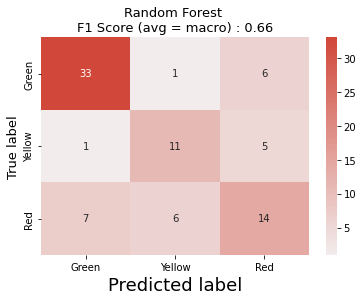

In [ ]:
#Plot the confusion Matrix Test set
plt.figure(figsize=(6, 4))

sns.heatmap(cm_df, 
            center=0, 
            cmap=sns.diverging_palette(220, 15, as_cmap=True), 
            annot=True, 
            fmt='g')

plt.title('Random Forest \nF1 Score (avg = macro) : {0:.2f}'.format(f1_score(y_test, rf_preds, average='macro')), fontsize = 13)
plt.ylabel('True label', fontsize = 13)
plt.xlabel('Predicted label', fontsize = 18)
plt.show()

In [ ]:
path = "/Users/vaspo224/Documents/UppsalaUniversity/PROTAC/Classification/KNIME-Protacs/Dataset/Prasad/Blind2.csv"
#path2 ="/Users/vaspo224/Documents/UppsalaUniversity/PROTAC/Classification/KNIME-Protacs/Dataset/VHL_Retrained2.csv"
blind2 =pd.read_csv(path)
blind2.head()

,Var01,Var02,Var03,Var04,Var05,Var06,Var07,Var08,Var09,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Class
0,860.60,642.49,0.27,64,35,3,19,19,70,7,3,0.40,4,10,185.20,721.20,2.85,Red
1,934.67,696.50,0.32,69,35,3,21,24,75,7,3,0.44,4,12,203.65,786.57,2.81,Yellow
2,802.52,594.35,0.23,60,35,3,18,15,66,7,3,0.36,4,9,175.97,662.39,2.84,Red
3,830.57,622.53,0.25,62,35,3,18,17,68,7,3,0.39,4,9,175.96,697.23,2.96,Red
4,988.85,767.04,0.29,73,41,3,20,23,80,8,3,0.57,5,10,193.97,862.67,3.65,Green


In [ ]:
blind2.head()

,Var01,Var02,Var03,Var04,Var05,Var06,Var07,Var08,Var09,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Class
0,860.60,642.49,0.27,64,35,3,19,19,70,7,3,0.40,4,10,185.20,721.20,2.85,Red
1,934.67,696.50,0.32,69,35,3,21,24,75,7,3,0.44,4,12,203.65,786.57,2.81,Yellow
2,802.52,594.35,0.23,60,35,3,18,15,66,7,3,0.36,4,9,175.97,662.39,2.84,Red
3,830.57,622.53,0.25,62,35,3,18,17,68,7,3,0.39,4,9,175.96,697.23,2.96,Red
4,988.85,767.04,0.29,73,41,3,20,23,80,8,3,0.57,5,10,193.97,862.67,3.65,Green


In [ ]:
df.head()

,Var01,Var02,Var03,Var04,Var05,Var06,Var07,Var08,Var09,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Class,Class_encode
0,963.31,718.22,0.25,70,38,1,19,19,76,7,3,0.41,5,12,234.20,758.58,2.12,Yellow,2
1,"1,050.00",786.32,0.30,76,38,1,21,25,82,7,3,0.45,5,14,252.65,841.37,2.10,Green,0
2,959.12,716.45,0.25,69,38,0,18,19,75,7,3,0.41,5,12,234.19,747.65,2.03,Green,0
3,"1,090.00",827.01,0.36,78,38,0,20,30,84,7,3,0.50,4,15,242.02,901.34,2.40,Green,0
4,"1,000.00",758.91,0.31,72,38,0,18,24,78,7,3,0.46,4,13,223.55,818.56,2.33,Green,0


In [ ]:
X_blind2 = blind2.loc[:,'Var01':'Var17']
y_blind2 = blind2.Class
X_blind2.head()

,Var01,Var02,Var03,Var04,Var05,Var06,Var07,Var08,Var09,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17
0,860.60,642.49,0.27,64,35,3,19,19,70,7,3,0.40,4,10,185.20,721.20,2.85
1,934.67,696.50,0.32,69,35,3,21,24,75,7,3,0.44,4,12,203.65,786.57,2.81
2,802.52,594.35,0.23,60,35,3,18,15,66,7,3,0.36,4,9,175.97,662.39,2.84
3,830.57,622.53,0.25,62,35,3,18,17,68,7,3,0.39,4,9,175.96,697.23,2.96
4,988.85,767.04,0.29,73,41,3,20,23,80,8,3,0.57,5,10,193.97,862.67,3.65


In [ ]:
lsa2 = TruncatedSVD(n_components=10, 
                   n_iter=10)

X2 = lsa2.fit_transform(X_blind2)
X2.shape

(50, 10)

In [ ]:
#Preliminary model evaluation using default parameters
def model_score_blind2(model_dict):   
    model_name, ac_score_list, p_score_list, r_score_list, f1_score_list, kappa_score, MCC = [], [], [],[], [], [], []
    for k,v in model_dict.items():   
        model_name.append(k)
        v.fit(X_train, y_train)
        y_pred = v.predict(X2)
        ac_score_list.append(accuracy_score(y_blind2, y_pred))
        p_score_list.append(precision_score(y_blind2, y_pred, average='macro'))
        r_score_list.append(recall_score(y_blind2, y_pred, average='macro'))
        f1_score_list.append(f1_score(y_blind2, y_pred, average='macro'))
        kappa_score.append(cohen_kappa_score(y_blind2, y_pred))
        MCC.append(matthews_corrcoef(y_blind2, y_pred))
        
        model_comparison_blind2 = pd.DataFrame([model_name, ac_score_list, p_score_list, r_score_list, f1_score_list, kappa_score, MCC]).T
        model_comparison_blind2.columns = ['model_name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'kappa_score', 'MCC']
        model_comparison_blind2 = model_comparison_blind2.sort_values(by='accuracy_score', ascending=False)
    return model_comparison_blind2

model_score_blind2(model_dict)

,model_name,accuracy_score,precision_score,recall_score,f1_score,kappa_score,MCC
0,Dummy,0.54,0.18,0.33,0.23,0.00,0.00
1,Stochastic Gradient Descent,0.54,0.18,0.33,0.23,0.00,0.00
6,K Nearest Neighbor,0.54,0.48,0.41,0.40,0.16,0.17
7,SVM,0.54,0.18,0.33,0.23,0.00,0.00
5,Gaussian Naive Bayes,0.48,0.37,0.38,0.37,0.07,0.08
2,Random Forest,0.46,0.41,0.33,0.32,-0.00,-0.00
3,Decision Tree,0.46,0.41,0.33,0.32,0.03,0.03
4,AdaBoost,0.38,0.32,0.28,0.28,-0.10,-0.11
8,GPC,0.24,0.08,0.33,0.13,0.00,0.00


In [ ]:
y_blind2

0        Red
1     Yellow
2        Red
3        Red
4      Green
5     Yellow
6        Red
7        Red
8     Yellow
9      Green
10    Yellow
11     Green
12     Green
13     Green
14     Green
15    Yellow
16    Yellow
17     Green
18     Green
19    Yellow
20    Yellow
21     Green
22     Green
23       Red
24       Red
25     Green
26    Yellow
27    Yellow
28       Red
29       Red
30     Green
31     Green
32     Green
33     Green
34     Green
35     Green
36     Green
37     Green
38     Green
39    Yellow
40     Green
41     Green
42     Green
43     Green
44       Red
45     Green
46       Red
47     Green
48     Green
49    Yellow
Name: Class, dtype: object

In [ ]:
rf_preds = rf_best_model.predict(X2)

In [ ]:
rf_preds

array(['Green', 'Red', 'Green', 'Green', 'Yellow', 'Green', 'Green',
       'Yellow', 'Green', 'Yellow', 'Yellow', 'Yellow', 'Green', 'Yellow',
       'Green', 'Green', 'Yellow', 'Green', 'Green', 'Green', 'Green',
       'Green', 'Green', 'Yellow', 'Green', 'Green', 'Green', 'Green',
       'Yellow', 'Yellow', 'Yellow', 'Green', 'Green', 'Green', 'Green',
       'Green', 'Green', 'Yellow', 'Green', 'Green', 'Green', 'Yellow',
       'Green', 'Green', 'Yellow', 'Green', 'Red', 'Green', 'Yellow',
       'Green'], dtype=object)

In [ ]:
Model_perfomance = pd.DataFrame()
Model_perfomance['Actual_Data'] = y_blind2

In [ ]:
Model_perfomance['RF_predicate'] = rf_preds

In [ ]:
Model_perfomance

,Actual_Data,RF_predicate
0,Red,Green
1,Yellow,Red
2,Red,Green
3,Red,Green
4,Green,Yellow
5,Yellow,Green
6,Red,Green
7,Red,Yellow
8,Yellow,Green
9,Green,Yellow


In [ ]:
#Confusion Matrix - RF (Test set)

#Get the confusion matrix and put it into a df
cm_blind_prediction = confusion_matrix(y_blind2, rf_preds)

In [ ]:
cm_blind_prediction

array([[19,  0,  8],
       [ 5,  1,  5],
       [ 9,  1,  2]])

In [ ]:
cm_blind_prediction_plot = pd.DataFrame(cm_blind_prediction,
                     index = ['Green','Yellow','Red'], 
                     columns = ['Green','Yellow','Red'])

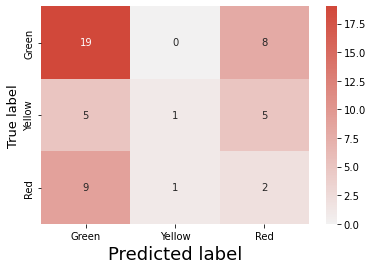

In [ ]:
#Plot the confusion Matrix Test set
plt.figure(figsize=(6, 4))

sns.heatmap(cm_blind_prediction_plot, 
            center=0, 
            cmap=sns.diverging_palette(220, 15, as_cmap=True), 
            annot=True, 
            fmt='g')

plt.ylabel('True label', fontsize = 13)
plt.xlabel('Predicted label', fontsize = 18)
plt.show()